# Titanic Survivals

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

Loading data

In [2]:
df=pd.read_csv("Titanic.csv")

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checking for null values

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
age_mean=df['Age'].mean()
age_mean

29.69911764705882

In [8]:
df['Age'].fillna(value=age_mean,inplace=True)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
df['Embarked'].fillna(value='S',inplace=True)

In [12]:
df=df.drop(['PassengerId','Ticket','Name','Cabin'],axis='columns')
#y_train=df['Survived']

In [13]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


   # Graphs

The percentage of survived  : 0.38
The percentage of not survived : 0.62


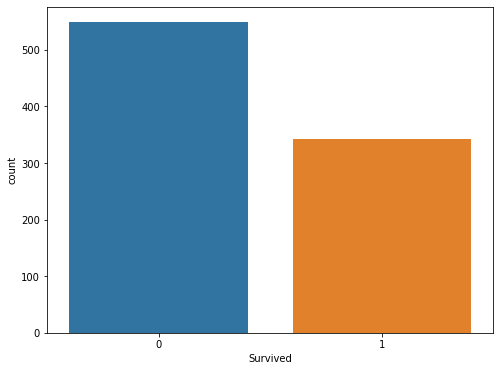

In [14]:

# let's look at the target percentage

plt.figure(figsize=(8,6))
sns.countplot(df['Survived']);


print('The percentage of survived  : %.2f' % (df['Survived'].value_counts()[1] / len(df)))
print('The percentage of not survived : %.2f' % (df['Survived'].value_counts()[0] / len(df)))


In [15]:
grp=df.groupby('Sex')
x1 = grp['Survived'].sum()
print(x1)

Sex
female    233
male      109
Name: Survived, dtype: int64


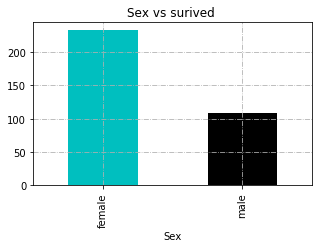

In [16]:
x1.plot(kind='bar',figsize=(5,3),color=("c","black"),title=('Sex vs surived '))

plt.grid(linestyle='-.')


In [17]:
grp=df.groupby('Pclass')
x2 = grp['Survived'].sum()
print(x2)

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


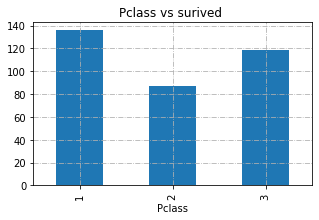

In [18]:
x2.plot(kind='bar',figsize=(5,3),title=('Pclass vs surived '))

plt.grid(linestyle='-.')


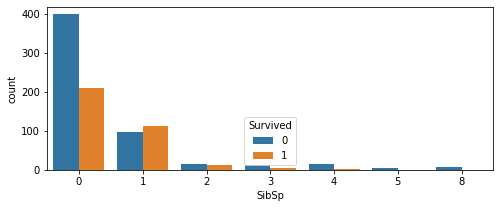

In [19]:
plt.figure(figsize=(8,3))
sns.countplot(x='SibSp', hue='Survived', data=df);


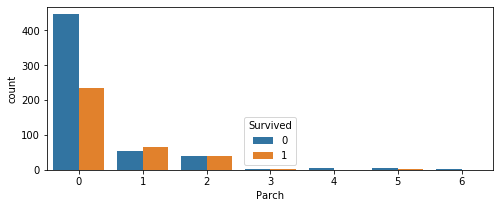

In [20]:
plt.figure(figsize=(8,3))
sns.countplot(x='Parch', hue='Survived', data=df);


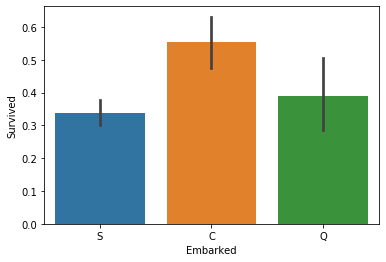

In [21]:
sns.barplot(x='Embarked', y='Survived', data=df)

In [23]:
df1=df[["Age","Fare","Survived"]]

In [24]:
df1['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
#sort the Fare into logical categories
df1["Fare"] = df1["Fare"]
bins = [-1, 0,100, 200,300,400, np.inf]
labels = ['zero','1-100','101-200','201-300','301-400','400+' ]
df1['Fare'] = pd.cut(df1["Fare"], bins, labels = labels)

C:\Users\vj\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vj\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


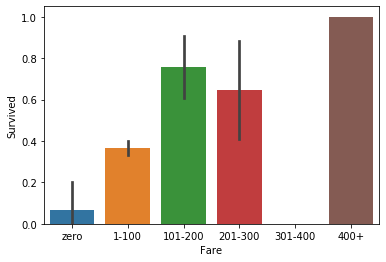

In [26]:

#Bar plot of Fare vs. survival
sns.barplot(x="Fare", y="Survived", data=df1)
plt.show()

In [27]:
#sort the ages into logical categories
df1["Age"] = df1["Age"]
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['infant','1-5', '6-12', '13-18', '19-24', '25-35', '40-60', '70+']
df1['Age'] = pd.cut(df1["Age"], bins, labels = labels)

C:\Users\vj\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vj\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


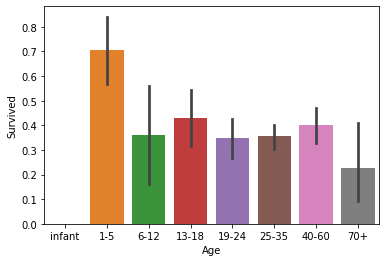

In [28]:

#Bar plot of Age vs. survival
sns.barplot(x="Age", y="Survived", data=df1)
plt.show()

# Handling categotical values

In [1]:
df.head(1)

NameError: name 'df' is not defined

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [31]:
from sklearn.preprocessing import LabelEncoder
Sex = LabelEncoder()
Embarked= LabelEncoder()

In [32]:
df['Sex_n'] = Sex.fit_transform(df['Sex'])
df['Embarked_n'] = Sex.fit_transform(df['Embarked'])

In [33]:
df=df.drop(['Sex',"Embarked"],axis='columns')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_n       891 non-null    int32  
 7   Embarked_n  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [35]:
df_inputs=df.drop('Survived',axis='columns')
df_target=df["Survived"]

In [36]:
df_inputs.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_n,Embarked_n
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0


# Model

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_inputs,df_target,train_size=0.8,random_state=10)

In [38]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=10)


In [39]:
model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [40]:
model.score(X_train, y_train)


0.9859550561797753

# Would you have survived

In [64]:
#class age sibsp parch fare sex embarked
#0means died and 1 means survived
model.predict([[3,10,0,2,200,1,2]])

array([1], dtype=int64)

In [65]:
#class age sibsp parch fare sex embarked
#0 means dead and 1 means survived
model.predict([[1,50,0,0,200,1,0]])

array([0], dtype=int64)